In [1]:
#This dataset contains insightful information related to insurance claims, giving us an in-depth look into the demographic 
#patterns of those receiving them. The dataset contains information on patient age, gender, BMI (Body Mass Index), 
#blood pressure levels, diabetic status, number of children, smoking status and region. By analyzing these key factors 
#across geographical areas and across different demographics such as age or gender we can gain a greater understanding of 
#who is most likely to receive an insurance claim.

In [2]:
#Installing Packages and Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from apyori import apriori

df = pd.read_csv(r'D:\2023\School\St Johns\Fall 2023\Data Mining\Project Insurance\insurance_data.csv')
print(df.head)

<bound method NDFrame.head of       index  PatientID   age  gender   bmi  bloodpressure diabetic  children  \
0         0          1  39.0    male  23.2             91      Yes         0   
1         1          2  24.0    male  30.1             87       No         0   
2         2          3   NaN    male  33.3             82      Yes         0   
3         3          4   NaN    male  33.7             80       No         0   
4         4          5   NaN    male  34.1            100       No         0   
...     ...        ...   ...     ...   ...            ...      ...       ...   
1335   1335       1336  44.0  female  35.5             88      Yes         0   
1336   1336       1337  59.0  female  38.1            120       No         1   
1337   1337       1338  30.0    male  34.5             91      Yes         3   
1338   1338       1339  37.0    male  30.4            106       No         0   
1339   1339       1340  30.0  female  47.4            101       No         0   

     smok

In [3]:
#Dropping Unique Rows

df1 = df.drop(['PatientID', 'index'], axis=1) 
print(df1.head)

<bound method NDFrame.head of        age  gender   bmi  bloodpressure diabetic  children smoker     region  \
0     39.0    male  23.2             91      Yes         0     No  southeast   
1     24.0    male  30.1             87       No         0     No  southeast   
2      NaN    male  33.3             82      Yes         0     No  southeast   
3      NaN    male  33.7             80       No         0     No  northwest   
4      NaN    male  34.1            100       No         0     No  northwest   
...    ...     ...   ...            ...      ...       ...    ...        ...   
1335  44.0  female  35.5             88      Yes         0    Yes  northwest   
1336  59.0  female  38.1            120       No         1    Yes  northeast   
1337  30.0    male  34.5             91      Yes         3    Yes  northwest   
1338  37.0    male  30.4            106       No         0    Yes  southeast   
1339  30.0  female  47.4            101       No         0    Yes  southeast   

         

In [4]:
#Displaying column names

df1.columns

Index(['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim'],
      dtype='object')

In [5]:
#Getting the amount of rows and columns

print('Number of instances = %d' % (df1.shape[0]))
print('Number of attributes = %d' % (df1.shape[1]))
df1.head()

Number of instances = 1340
Number of attributes = 9


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [6]:
#Pre-processing missing values

df1 = df1.replace('?',np.NaN) #Replacing NA's with ?

print('Number of instances = %d' % (df1.shape[0])) #rows
print('Number of attributes = %d' % (df1.shape[1])) #columns

print('Number of missing values:')
for col in df1.columns:
    print('\t%s: %d' % (col,df1[col].isna().sum()))
    
#Show the columns and how many missing values there is

Number of instances = 1340
Number of attributes = 9
Number of missing values:
	age: 5
	gender: 0
	bmi: 0
	bloodpressure: 0
	diabetic: 0
	children: 0
	smoker: 0
	region: 3
	claim: 0


In [7]:
#Getting rid of missing value rows

print('Number of rows in original data = %d' % (df1.shape[0])) #Shows rows before getting rid of Na's

df2 = df1.dropna() #drops Na's
print('Number of rows after discarding missing values = %d' % (df2.shape[0])) #Shows rows after discarding NA's

Number of rows in original data = 1340
Number of rows after discarding missing values = 1332


In [8]:
#More descriptions of the data values

print('Number of instances = %d' % (df2.shape[0]))
print('Number of attributes = %d' % (df2.shape[1]))
df2.head()

Number of instances = 1332
Number of attributes = 9


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46


Number of instances = 1332
Number of attributes = 4


<Axes: >

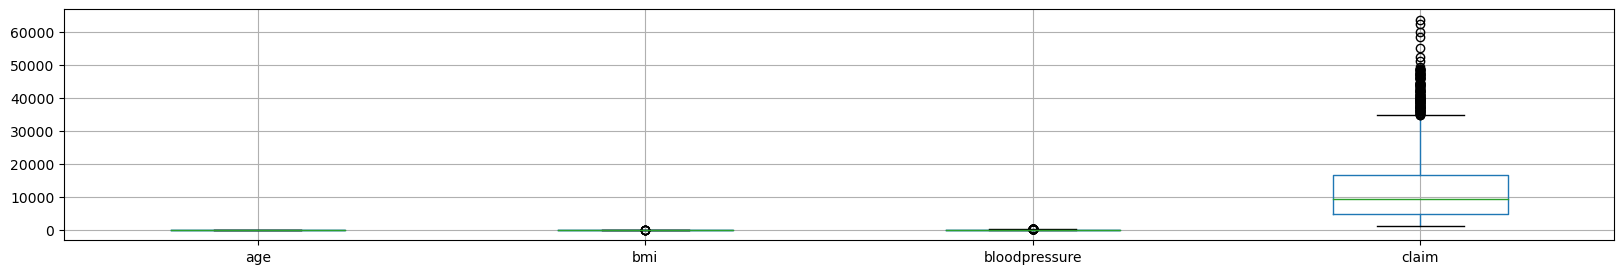

In [10]:
#Show box and whisker for numeric columns

df3 = df2[['age', 'bmi', 'bloodpressure', 'claim']]
df3Age = df3[['age']]
df3Claim = df3[['claim']]
df3Bmi = df3[['bmi',]]
df3BP = df3[['bloodpressure']]

print('Number of instances = %d' % (df3.shape[0]))
print('Number of attributes = %d' % (df3.shape[1]))
df3.head()

%matplotlib inline



df3.boxplot(figsize=(20,3))

<Axes: >

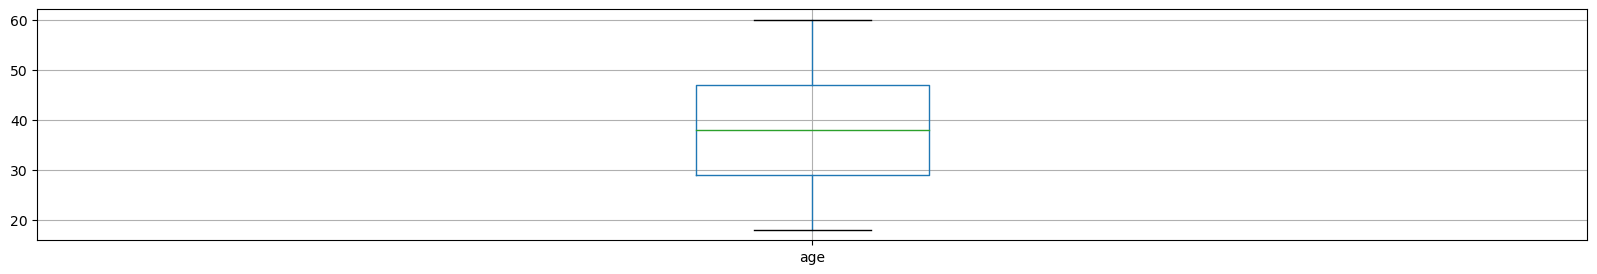

In [11]:
#Age boxplot

df3Age.boxplot(figsize=(20,3))

<Axes: >

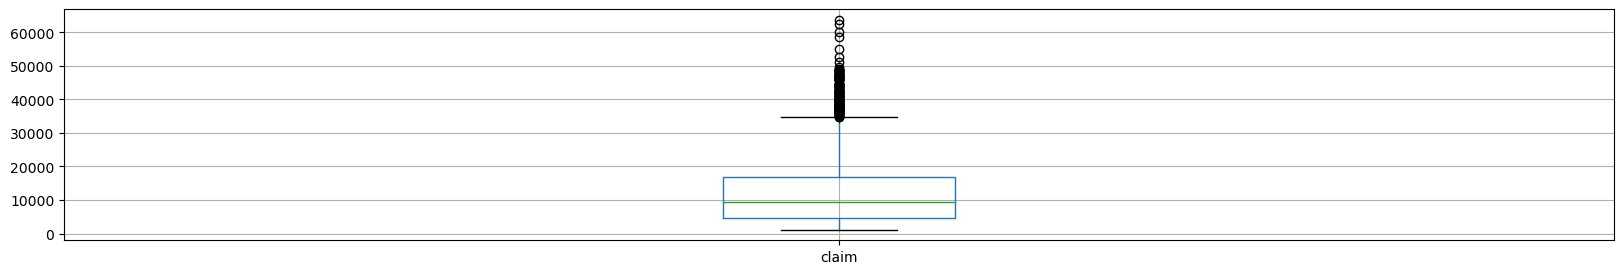

In [13]:
#Claim boxplot

df3Claim.boxplot(figsize=(20,3))

<Axes: >

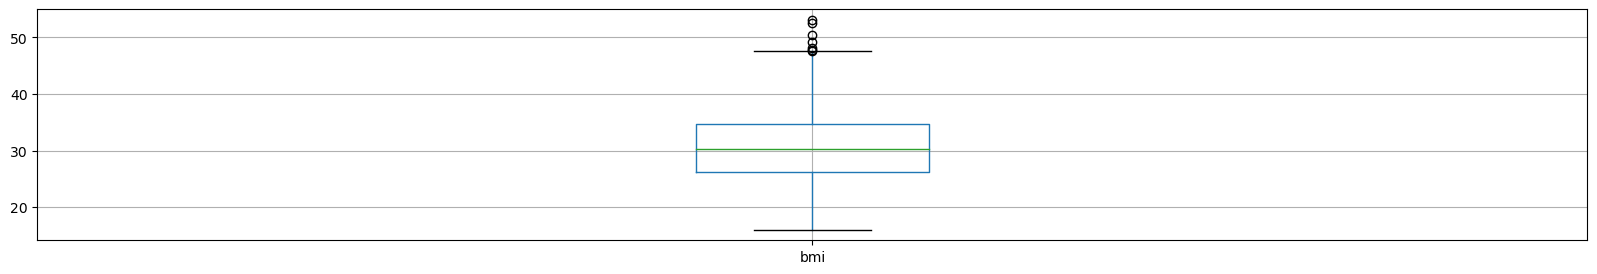

In [14]:
#Bmi boxplot

df3Bmi.boxplot(figsize=(20,3))

<Axes: >

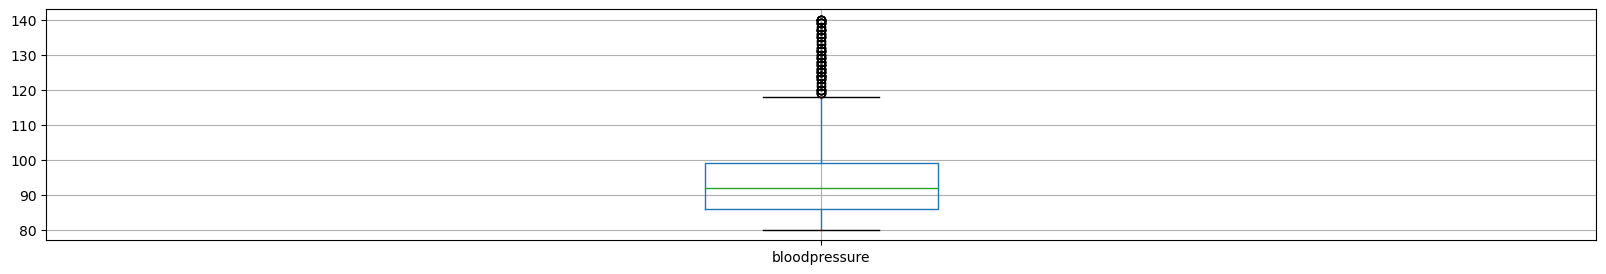

In [15]:
#blood pressure boxplot

df3BP.boxplot(figsize=(20,3))

In [16]:
#Z Scores

Z = (df3-df3.mean())/df3.std()
Z #Z Scores for numeric columns

,age,bmi,bloodpressure,claim
0,0.082217,-1.218888,-0.278649,-1.007742
1,-1.267577,-0.091246,-0.628142,-1.006946
7,-1.717509,1.706443,0.507708,-1.005684
8,-1.627522,2.016953,-0.715515,-1.005469
9,-0.727659,3.667558,0.245589,-1.004308
...,...,...,...,...
1335,0.532149,0.791256,-0.540769,3.452639
1336,1.881943,1.216164,2.255170,3.736353
1337,-0.727659,0.627829,-0.278649,3.856120
1338,-0.097755,-0.042218,1.031947,4.068470


In [17]:
#Discarding values outside of 3 Z scores

print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0])) #No outliers worth discarding

Number of rows before discarding outliers = 1332
Number of rows after discarding missing values = 0


In [18]:
#Dataframe of numeric columns

df3

,age,bmi,bloodpressure,claim
0,39.0,23.2,91,1121.87
1,24.0,30.1,87,1131.51
7,19.0,41.1,100,1146.80
8,20.0,43.0,86,1149.40
9,30.0,53.1,97,1163.46
...,...,...,...,...
1335,44.0,35.5,88,55135.40
1336,59.0,38.1,120,58571.07
1337,30.0,34.5,91,60021.40
1338,37.0,30.4,106,62592.87


In [19]:
#Fully cleaned Data

df2

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [20]:
#Min age for binning age data

df2['age'].min()

18.0

In [21]:
#Adding new features

def add_obesity(value):
    if value < 18.5:
        return 'Underweight'
    elif value >= 18.5 and value < 25:
        return 'Healthy'
    elif value >= 25 and value < 30:
        return 'Overweight'
    elif value >= 30 and value < 35:
        return 'Class 1 Obese'
    elif value >= 35 and value < 40:
        return 'Class 2 Obese'
    else:
        return 'Class 3 Obese'
    
df2['wtClass'] = df2['bmi'].apply(add_obesity)

def add_BP(value):
    if value < 130:
        return 'Low Blood Pressure'
    else:
        return 'High Blood Pressure'
df2['bpClass'] = df2['bloodpressure'].apply(add_BP)

def add_Age(value):
    if value > 17 and value < 36:
        return 'Young Adult'
    elif value > 35 and value < 55:
        return 'Middle-Aged Adult'
    else:
        return 'Older Adult'
    
df2['ageClass'] = df2['age'].apply(add_Age)

def add_Claims(value):
    if value < 25000:
        return 'Low Claim'
    elif value > 25000 and value < 50000:
        return 'Middle Claim'
    else:
        return 'High Claim'
    
df2['claimClass'] = df2['claim'].apply(add_Claims)

df2

C:\Users\jhaye\AppData\Local\Temp\ipykernel_2784\3776627857.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jhaye\AppData\Local\Temp\ipykernel_2784\3776627857.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jhaye\AppData\Local\Temp\ipykernel_2784\3776627857.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,wtClass,bpClass,ageClass,claimClass
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Healthy,Low Blood Pressure,Middle-Aged Adult,Low Claim
1,24.0,male,30.1,87,No,0,No,southeast,1131.51,Class 1 Obese,Low Blood Pressure,Young Adult,Low Claim
7,19.0,male,41.1,100,No,0,No,northwest,1146.80,Class 3 Obese,Low Blood Pressure,Young Adult,Low Claim
8,20.0,male,43.0,86,No,0,No,northwest,1149.40,Class 3 Obese,Low Blood Pressure,Young Adult,Low Claim
9,30.0,male,53.1,97,No,0,No,northwest,1163.46,Class 3 Obese,Low Blood Pressure,Young Adult,Low Claim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,Class 2 Obese,Low Blood Pressure,Middle-Aged Adult,High Claim
1336,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,Class 2 Obese,Low Blood Pressure,Older Adult,High Claim
1337,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,Class 1 Obese,Low Blood Pressure,Young Adult,High Claim
1338,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,Class 1 Obese,Low Blood Pressure,Middle-Aged Adult,High Claim


In [22]:
#Data Exploration

import plotly.express as px

fig = px.histogram(df2, x = 'age', nbins=5)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'age', nbins=5, color='region') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'age', nbins=5, color='diabetic') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'age', nbins=5, color='gender') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [23]:
#Data Exploration

import plotly.express as px

fig = px.histogram(df2, x = 'claim', nbins=4)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'claim', nbins=3, color='region') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'claim', nbins=5, color='diabetic') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'claim', nbins=5, color='gender') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
#Data Exploration

fig = px.histogram(df2, x = 'ageClass', nbins=5)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'ageClass', nbins=5, color='wtClass') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'ageClass', nbins=5, color='bpClass') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'ageClass', nbins=5, color='gender') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [25]:
#Data Exploration

fig = px.histogram(df2, x = 'bpClass', nbins=5)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'bpClass', nbins=5, color='wtClass') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'bpClass', nbins=5, color='ageClass') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'bpClass', nbins=5, color='gender') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [26]:
#Data Exploration

import plotly.express as px

fig = px.histogram(df2, x = 'wtClass', nbins=5)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'wtClass', nbins=5, color='bpClass') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'wtClass', nbins=5, color='ageClass') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'wtClass', nbins=5, color='claimClass') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [28]:
#Data Exploration

import plotly.express as px

fig = px.histogram(df2, x = 'diabetic', nbins=5)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'diabetic', nbins=5, color='bpClass') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'diabetic', nbins=5, color='ageClass') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'diabetic', nbins=5, color='wtClass') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [29]:
#Data Exploration

fig = px.histogram(df2, x = 'claimClass', nbins=15)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'claimClass', nbins=15, color='wtClass') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'claimClass', nbins=15, color='ageClass') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'claimClass', nbins=15, color='bpClass') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'claimClass', nbins=15, color='smoker') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [30]:
#Data Exploration

fig = px.histogram(df2, x = 'smoker', nbins=15)
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'smoker', nbins=15, color='wtClass') #Regions are evenly distributed
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'smoker', nbins=15, color='ageClass') #Diabetic
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'smoker', nbins=15, color='bpClass') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df2, x = 'smoker', nbins=15, color='claimClass') #Only males under 10, A lot of Females over 50
fig.update_layout(bargap=0.2)
fig.show()

In [32]:
#Important Graphs

figAge = px.histogram(df2, x = 'gender', nbins=5, color='ageClass') #Only males under 18-20, A lot of Females over 50
figAge.update_layout(bargap=0.2)
figAge.show()

figClaimBP = px.histogram(df2, x = 'claimClass', nbins=15, color='bpClass') #High Blood Pressure in Medium Claims
figClaimBP.update_layout(bargap=0.2)
figClaimBP.show()

figClaimWt = px.histogram(df2, x = 'claimClass', nbins=15, color='wtClass') #High Claims are class 1, 2, 3 obese
figClaimWt.update_layout(bargap=0.2)
figClaimWt.show()

figClaimSmo = px.histogram(df2, x = 'claimClass', nbins=15, color='smoker') #non-smokers have lower claims
figClaimSmo.update_layout(bargap=0.2)
figClaimSmo.show()

C:\Users\jhaye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jhaye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



The centroids for the groups are:
[[46.47101449 24.28550725]
 [23.79591837 24.57653061]
 [29.69032258 31.23096774]
 [46.2556391  32.14285714]
 [21.39583333 32.31041667]
 [55.95238095 35.12261905]
 [35.74336283 36.76725664]
 [45.85333333 40.588     ]
 [33.50819672 23.07459016]
 [39.11267606 29.26126761]
 [25.35365854 40.22317073]
 [56.15957447 25.97659574]]


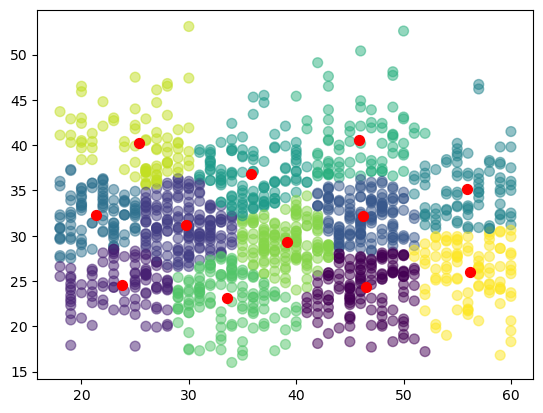

In [51]:
#Important Graphs

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df4 = pd.DataFrame(df3, columns=['age', 'bmi'])

model = KMeans(n_clusters=12).fit(df4)

centroids = model.cluster_centers_
print("The centroids for the groups are:")
print(centroids)

plt.scatter(df4['age'], df4['bmi'], c= model.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

C:\Users\jhaye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jhaye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



The centroids for the groups are:
[[2.86615970e+01 1.97839118e+04]
 [3.04813596e+01 6.68167454e+03]
 [3.50312102e+01 4.10979125e+04]]


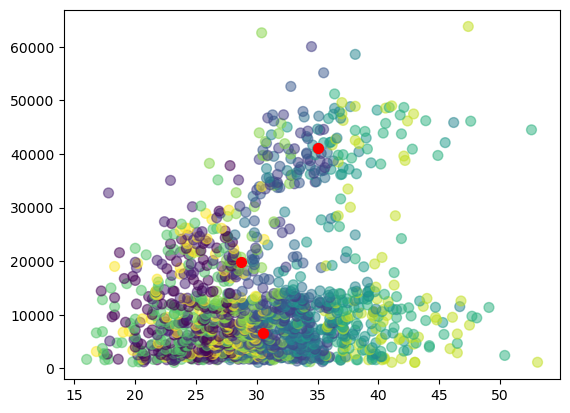

In [52]:
#Important Graphs

df5 = pd.DataFrame(df3, columns=['bmi', 'claim'])

modelBmi = KMeans(n_clusters=3).fit(df5)

centroids = modelBmi.cluster_centers_
print("The centroids for the groups are:")
print(centroids)

plt.scatter(df5['bmi'], df5['claim'], c= model.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<Axes: xlabel='bmi', ylabel='claim'>

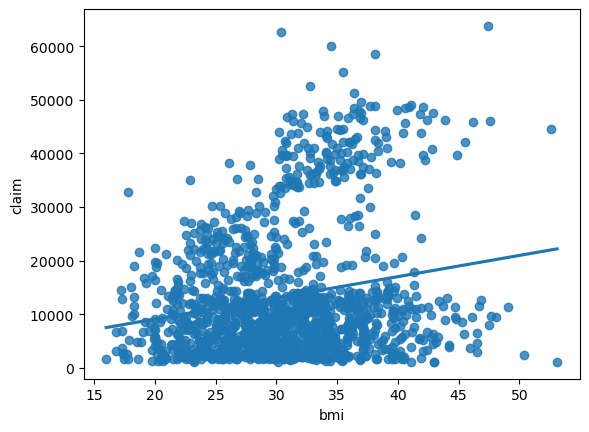

In [53]:
#Important Graphs

import seaborn as sns
sns.regplot(x=df5['bmi'], y=df5['claim'], ci=None)

C:\Users\jhaye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jhaye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



The centroids for the groups are:
[[   90.97916667  6681.67453947]
 [  109.27388535 41097.91248408]
 [   96.31558935 19783.91178707]]


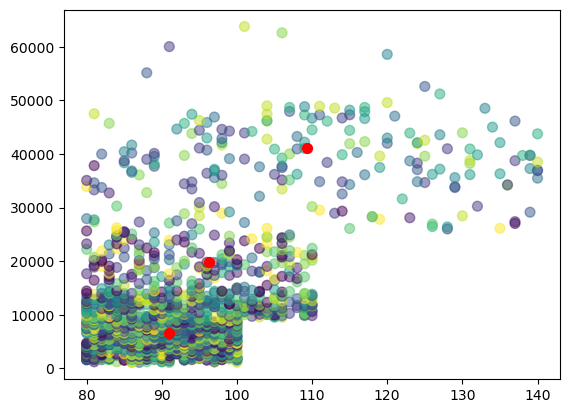

In [54]:
#Important Graphs

df6 = pd.DataFrame(df3, columns=['bloodpressure', 'claim'])

modelBP = KMeans(n_clusters=3).fit(df6)

centroids = modelBP.cluster_centers_
print("The centroids for the groups are:")
print(centroids)

plt.scatter(df6['bloodpressure'], df5['claim'], c= model.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<Axes: xlabel='bloodpressure', ylabel='claim'>

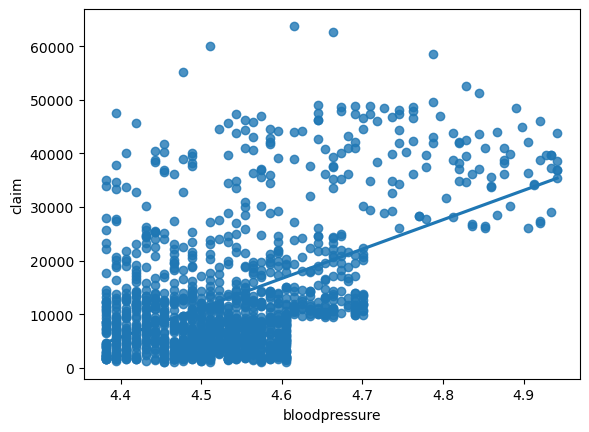

In [55]:
#Important Graphs

import seaborn as sns
sns.regplot(x=np.log(df3['bloodpressure']), y=df3['claim'], ci=None)

In [33]:
#Creating data frames with only new features

dfCat = df2[['gender', 'diabetic', 'smoker', 'children', 'region', 'wtClass', 'bpClass', 'ageClass', 'claimClass']]
dfCat

dfCat9 = df2[['gender', 'diabetic', 'smoker', 'children', 'region', 'wtClass', 'bpClass', 'ageClass', 'claimClass']]
dfCat9

,gender,diabetic,smoker,children,region,wtClass,bpClass,ageClass,claimClass
0,male,Yes,No,0,southeast,Healthy,Low Blood Pressure,Middle-Aged Adult,Low Claim
1,male,No,No,0,southeast,Class 1 Obese,Low Blood Pressure,Young Adult,Low Claim
7,male,No,No,0,northwest,Class 3 Obese,Low Blood Pressure,Young Adult,Low Claim
8,male,No,No,0,northwest,Class 3 Obese,Low Blood Pressure,Young Adult,Low Claim
9,male,No,No,0,northwest,Class 3 Obese,Low Blood Pressure,Young Adult,Low Claim
...,...,...,...,...,...,...,...,...,...
1335,female,Yes,Yes,0,northwest,Class 2 Obese,Low Blood Pressure,Middle-Aged Adult,High Claim
1336,female,No,Yes,1,northeast,Class 2 Obese,Low Blood Pressure,Older Adult,High Claim
1337,male,Yes,Yes,3,northwest,Class 1 Obese,Low Blood Pressure,Young Adult,High Claim
1338,male,No,Yes,0,southeast,Class 1 Obese,Low Blood Pressure,Middle-Aged Adult,High Claim


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 5113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 5113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

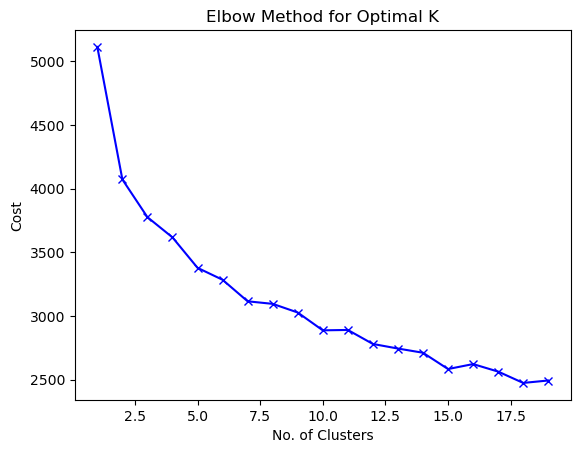

In [34]:
#KModes Clustering
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

cost = []
K = range(1, 20)

for num_clusters in K:
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=12, verbose=1)
    kmode.fit_predict(dfCat)
    cost.append(kmode.cost_)

# Plot the Elbow Method graph
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K')
plt.show()

#4, 7 and 11 look good, results will differ every time

In [37]:
#Creating different datasets with 4, 7, and 11 clusters

from kmodes.kmodes import KModes
kmode7 = KModes(n_clusters=7, init = "random", n_init = 5, verbose=1)
clusters7 = kmode7.fit_predict(dfCat)
clusters7

kmode11 = KModes(n_clusters=11, init = "random", n_init = 5, verbose=1)
clusters11 = kmode11.fit_predict(dfCat)
clusters11

kmode4 = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters4 = kmode4.fit_predict(dfCat)
clusters4

#Different Cluster Sizes
dfCatClasses4 = dfCat.copy()
dfCatClasses7 = dfCat.copy()
dfCatClasses11 = dfCat.copy()
dfCatClasses4.insert(0, "Cluster", clusters4, True)
dfCatClasses7.insert(0, "Cluster", clusters7, True)
dfCatClasses11.insert(0, "Cluster", clusters11, True)
print(dfCatClasses4) #4 Clusters
print(dfCatClasses7) #7 Clusters
print(dfCatClasses11) #11 Clusters
print(dfCat) #No Class

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 440, cost: 3299.0
Run 1, iteration: 2/100, moves: 131, cost: 3299.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 84, cost: 3360.0
Run 2, iteration: 2/100, moves: 138, cost: 3360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 243, cost: 3207.0
Run 3, iteration: 2/100, moves: 49, cost: 3207.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 255, cost: 3287.0
Run 4, iteration: 2/100, moves: 121, cost: 3287.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 402, cost: 3180.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 311, cost: 3023.0


In [38]:
print(dfCatClasses4['Cluster'].value_counts())
print(dfCatClasses7['Cluster'].value_counts())
print(dfCatClasses11['Cluster'].value_counts())

Cluster
0    568
1    350
3    257
2    157
Name: count, dtype: int64
Cluster
0    335
3    227
4    217
1    187
2    143
6    121
5    102
Name: count, dtype: int64
Cluster
0     239
1     191
6     166
2     156
5     141
9     120
7      90
4      88
3      84
8      32
10     25
Name: count, dtype: int64


In [41]:
#Creating new datasets with dummy columns

dataEncoded4 = pd.get_dummies(dfCatClasses4, columns=['gender', 'diabetic', 'smoker', 'children', 'region',
                                             'wtClass', 'bpClass', 'ageClass', 'claimClass'])
dataEncoded7 = pd.get_dummies(dfCatClasses7, columns=['gender', 'diabetic', 'smoker', 'children', 'region',
                                             'wtClass', 'bpClass', 'ageClass', 'claimClass'])
dataEncoded11 = pd.get_dummies(dfCatClasses11, columns=['gender', 'diabetic', 'smoker', 'children', 'region',
                                             'wtClass', 'bpClass', 'ageClass', 'claimClass'])

print(dataEncoded4)
print(dataEncoded7)
print(dataEncoded11)

      Cluster  gender_female  gender_male  diabetic_No  diabetic_Yes  \
0           0          False         True        False          True   
1           1          False         True         True         False   
7           1          False         True         True         False   
8           1          False         True         True         False   
9           1          False         True         True         False   
...       ...            ...          ...          ...           ...   
1335        2           True        False        False          True   
1336        2           True        False         True         False   
1337        1          False         True        False          True   
1338        2          False         True         True         False   
1339        2           True        False         True         False   

      smoker_No  smoker_Yes  children_0  children_1  children_2  ...  \
0          True       False        True       False       False

In [42]:
#Creating train and test sset

from sklearn.model_selection import train_test_split
x4 = dataEncoded4.drop(['Cluster'], axis=1)
y4 = dataEncoded4['Cluster']
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, train_size=0.7, test_size=0.3)

x7 = dataEncoded7.drop(['Cluster'], axis=1)
y7 = dataEncoded7['Cluster']
x_train7, x_test7, y_train7, y_test7 = train_test_split(x7, y7, train_size=0.7, test_size=0.3)

x11 = dataEncoded11.drop(['Cluster'], axis=1)
y11 = dataEncoded11['Cluster']
x_train11, x_test11, y_train11, y_test11 = train_test_split(x11, y11, train_size=0.7, test_size=0.3)

In [49]:
#Test sets

print(x_train4.shape)
print(x_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

print(x_train7.shape)
print(x_test7.shape)
print(y_train7.shape)
print(y_test7.shape)

print(x_train11.shape)
print(x_test11.shape)
print(y_train11.shape)
print(y_test11.shape)

(932, 30)
(400, 30)
(932,)
(400,)
(932, 30)
(400, 30)
(932,)
(400,)
(932, 30)
(400, 30)
(932,)
(400,)


In [43]:
#Creating decision trees with entropy 

from sklearn import tree
myTree4 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15)  #gini is another criterion we can use
myTree4 = myTree4.fit(x_train4, y_train4)

myTree7 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15)  #gini is another criterion we can use
myTree7 = myTree7.fit(x_train7, y_train7)

myTree11 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=15)  #gini is another criterion we can use
myTree11 = myTree11.fit(x_train11, y_train11)

In [44]:
#Creating decision trees with gini

from sklearn import tree
myTreeG4 = tree.DecisionTreeClassifier(criterion='gini',max_depth=15)  #gini is another criterion we can use
myTreeG4 = myTreeG4.fit(x_train4, y_train4)

myTreeG7 = tree.DecisionTreeClassifier(criterion='gini',max_depth=15)  #gini is another criterion we can use
myTreeG7 = myTreeG7.fit(x_train7, y_train7)

myTreeG11 = tree.DecisionTreeClassifier(criterion='gini',max_depth=15)  #gini is another criterion we can use
myTreeG11 = myTreeG11.fit(x_train11, y_train11)

In [45]:
#Test accuracy for each decision tree

predictions4 = myTree4.predict(x_test4)
predictions7 = myTree7.predict(x_test7)
predictions11 = myTree11.predict(x_test11)

predictionsG4 = myTreeG4.predict(x_test4)
predictionsG7 = myTreeG7.predict(x_test7)
predictionsG11 = myTreeG11.predict(x_test11)


from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test4, predictions4)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test7, predictions7)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test11, predictions11)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test4, predictionsG4)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test7, predictionsG7)))
print('Accuracy on test data is %.2f' % (accuracy_score(y_test11, predictionsG11)))

#Decision Tree with 4 clusters, entropy and max depth 15 is best model

Accuracy on test data is 0.93
Accuracy on test data is 0.92
Accuracy on test data is 0.90
Accuracy on test data is 0.94
Accuracy on test data is 0.89
Accuracy on test data is 0.90


In [47]:
#Value counts of clusters in each data sets

de4 = dataEncoded4['Cluster'].value_counts()
de7 = dataEncoded7['Cluster'].value_counts()
de11 = dataEncoded11['Cluster'].value_counts()

print(de4)
print(de7)
print(de11)

Cluster
0    568
1    350
3    257
2    157
Name: count, dtype: int64
Cluster
0    335
3    227
4    217
1    187
2    143
6    121
5    102
Name: count, dtype: int64
Cluster
0     239
1     191
6     166
2     156
5     141
9     120
7      90
4      88
3      84
8      32
10     25
Name: count, dtype: int64


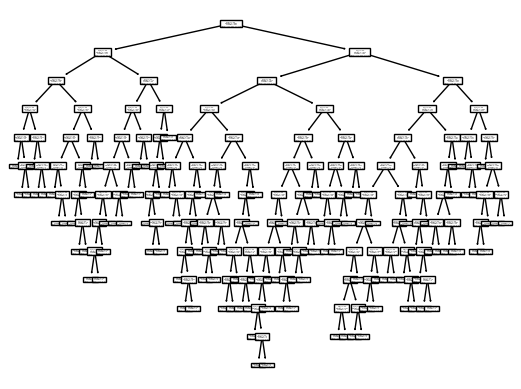

In [48]:
tree.plot_tree(myTree4)
plt.show()

In [245]:
#Downloading clean datasets for R analysis

dataEncoded4.to_csv("D:/2023/School/St Johns/Fall 2023/Data Mining/Project Insurance/insuranceDataWClustersDummy.csv", index=False)
dfCatClasses4.to_csv("D:/2023/School/St Johns/Fall 2023/Data Mining/Project Insurance/insuranceDataWClusters.csv", index=False)
